## Problem 3.4

ポテンシャルは
$$
\Phi(r,\theta,\phi) = \sum_{l=0}^\infty \sum_{m=-l}^{l} A_{lm} \left(\frac{r}{a}\right)^l Y_{lm}(\theta,\phi)
$$
とかける．ただし$m = \pm n, \pm 3n, \pm5n, \ldots$のときは
$$
A_{lm} = -4iV \frac{n}{m} \sqrt{\frac{2l+1}{4\pi}\frac{(l-m)!}{(l+m)!}} \int_{-1}^1 P_{l}^m (\cos\theta) \mathrm{d}(\cos\theta)
$$
で，それ以外では$A_{lm} = 0$である．

In [3]:
##--- common ---##
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
from matplotlib import cm

/var/folders/9_/tqw15_3j479cd2ql4n3r_t700000gn/T/ipykernel_27598/2126938127.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intg,_= integrate.quad(integrand,-1,1)


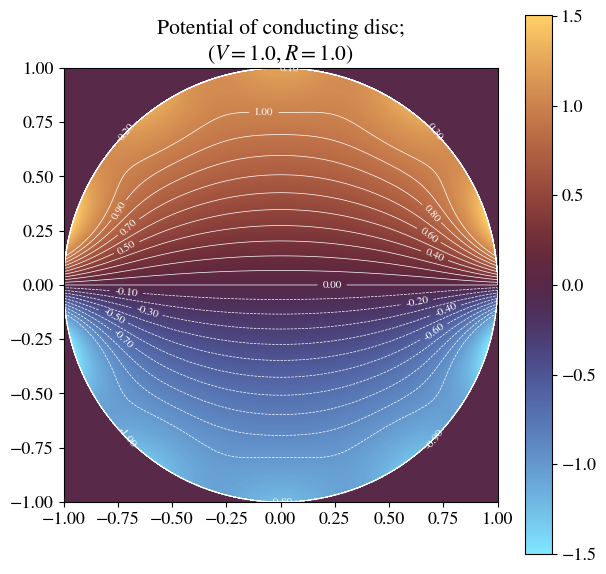

In [86]:
def calc_Alm(l,m,n,V):
    integrand = lambda x: sp.lpmv(m,l,x)
    intg,_= integrate.quad(integrand,-1,1)
    Alm = -4j*V * n / m * np.sqrt((2*l+1)/(4*np.pi) * sp.gamma(l-m+1)/sp.gamma(l+m+1)) * intg
    return Alm
    
#--- initial condition(s) ---#
nn = 2# number of segments is 2n
NN = 100# number of grids per unit grid
vv = 1.0# potential
aa = 1.0# radius of sphere
lmax = 10# number of terms



#--- READY ---#
xx = np.linspace(-1*aa,1*aa,NN*10)
yy = np.linspace(-1*aa,1*aa,NN*10)
xx,yy=np.meshgrid(xx,yy)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+yy**2)
##xx = rr*cos(ph), yy = rr*sin(ph)
##→ph = atan(yy/xx)
ph = np.arctan2(yy,xx)
ph = (ph + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
#cos_t = np.cos(th)

#--- calculation ---#

phi_in = np.full_like(xx,0.0, dtype=np.complex128)


for l in range(0,lmax+1):
    for m in range(-l, l+1):
        if m%n == 0 and (m//n)%2 != 0:
            phi_in += calc_Alm(l,m,nn,vv) * (rr/aa)**(l) * sp.sph_harm_y(m,l,np.pi/2,ph)



#--- drawing ---#
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
tle = "Potential of conducting disc;\n" + r"($V = 1.0, R = 1.0$)"
ax.set_title(tle)



phi = np.where(rr <= aa, np.real(phi_in), 0.0)



mesh=ax.pcolormesh(xx,yy,phi,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,yy,phi,colors='white',linewidths=0.5,levels=np.linspace(-V,V,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-3_normal_w_circle.png',dpi=300,bbox_inches='tight')
plt.show()

